# Data Cleaning and Exploratory Data Analysis

by Sudarshan Bahurupe

#### Purpose: 

To utilize data cleaning and EDA to elicit some interesting insights provided data

## Initial Data Cleaning

#### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.pyplot as mp
%matplotlib inline
import seaborn as sns

import plotly.graph_objects as go
import folium
import plotly.express as px
import os
from datetime import datetime

from itertools import chain, combinations

#### 2. Check Null, Values, Drop Duplicates, Null Value Treatment

In [2]:
#Import data from .csv file
df = pd.read_csv('C:\\Users\\Sudarshan\\Documents\\DS\\Assignment\\assignment_data\\assignment_data.csv')
df[10000:10010]

,Unnamed: 0,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv
10000,10000,MT-6182336013,684278980,NaN,GO-MART,2021-01-25 09:09:17.825000+00:00,0.0
10001,10001,MT-3791879913,558034285,700773536.0,GO-MART,2021-01-25 09:09:21.608000+00:00,113400.0
10002,10002,MT-9825226602,546595100,700537679.0,GO-MART,2021-01-25 09:09:24.540000+00:00,54200.0
10003,10003,MT-3395952510,558737061,541320207.0,GO-MART,2021-01-25 09:09:26.944000+00:00,35600.0
10004,10004,MT-9955875832,551150246,700260181.0,GO-MART,2021-01-25 09:09:30.084000+00:00,334100.0
10005,10005,MT-8820230261,633825125,541541891.0,GO-MART,2021-01-25 09:09:46.899000+00:00,23400.0
10006,10006,MT-6397226258,548011858,541655716.0,GO-MART,2021-01-25 09:09:49.701000+00:00,16300.0
10007,10007,MT-9107511330,603301463,700804185.0,GO-MART,2021-01-25 09:09:56.878000+00:00,177400.0
10008,10008,MT-1173876347,599588605,540399193.0,GO-MART,2021-01-25 09:10:00.977000+00:00,162100.0
10009,10009,MT-1874931962,577557817,540400143.0,GO-MART,2021-01-25 09:10:02.808000+00:00,83900.0


In [3]:
df.count()

Unnamed: 0      5820463
order_no        5820463
customer_id     5820463
driver_id       5149296
service_type    5820463
booking_time    5820463
actual_gmv      2405456
dtype: int64

In [4]:
df.isnull().sum()

Unnamed: 0            0
order_no              0
customer_id           0
driver_id        671167
service_type          0
booking_time          0
actual_gmv      3415007
dtype: int64

Drop duplicated values based on 'order_no,customer_id,driver_id,service_type,booking_time,actual_gmv'

In [5]:
df.drop_duplicates(subset=['order_no','customer_id','driver_id', 'service_type', 'booking_time','actual_gmv'],keep='first',inplace=True)
df.nunique()

Unnamed: 0      4656369
order_no        4656369
customer_id     1948568
driver_id        329887
service_type         20
booking_time    4647721
actual_gmv        44468
dtype: int64

In [6]:
#Checking number of nulls remaining in data
df.isnull().sum()

Unnamed: 0            0
order_no              0
customer_id           0
driver_id        536897
service_type          0
booking_time          0
actual_gmv      2732903
dtype: int64

Converting booking time to proper date format

In [7]:
df['booking_date']=pd.to_datetime(df['booking_time'], format= '%Y-%m-%d %H:%M:%S.%f%z').dt.strftime('%Y-%m-%d')

Getting list of driver ids

In [8]:
drivers=[]
for each in df['driver_id'].unique():
    if each != None:
        if each != 0.0:
            drivers.append(each)

replacing null ans zero values with driver ids using random replacement techniques

In [9]:
df.loc[df['driver_id'].isna(), 'driver_id'] = [i for i in np.random.choice(drivers, df['driver_id'].isna().sum())]
zero_driver_df=df[df['driver_id']==0.0].count()
zero_driver_df[0]
df.loc[df['driver_id']==0.0, 'driver_id'] = [i for i in np.random.choice(drivers,int(zero_driver_df[0]))]

Plotting box-whiskers chart to analyse outliers and quartile

(-10000.0, 300000.0)

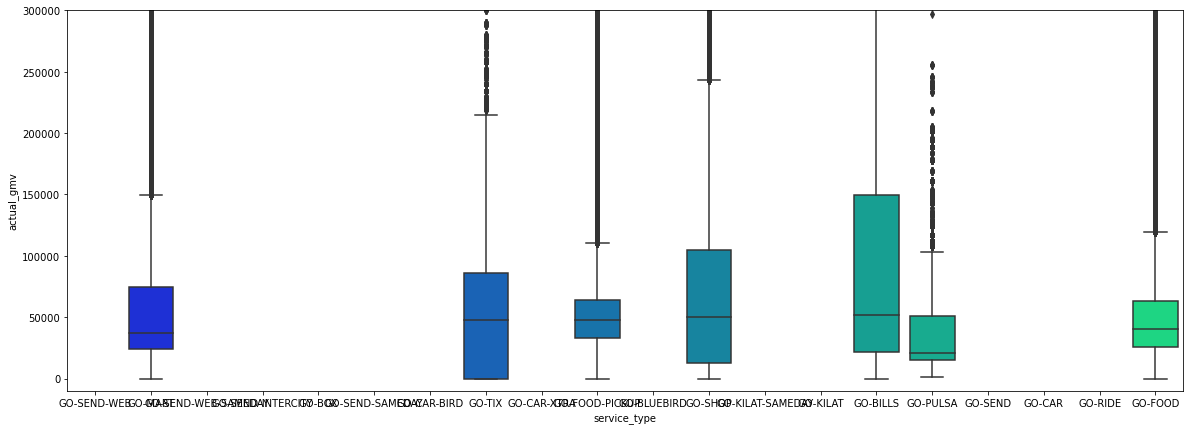

In [10]:
plt.figure(figsize=(20, 7))
sns.boxplot(x='service_type',y='actual_gmv',data=df , palette='winter').set_ylim([-10000,300000])


Identifying unique and primary column

In [11]:
for each in df.columns:
    if df[each].count()==df[each].drop_duplicates().count():
        print(each)

Unnamed: 0
order_no


Null value heatmap across dataframe

<AxesSubplot:>

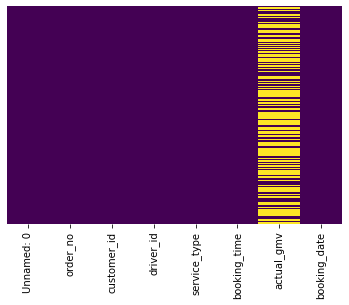

In [12]:
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

Getting mode values to replace null values across services

In [ ]:
df[df['actual_gmv']==0.0].count()

In [ ]:
# for each in df['service_type'].unique():
#     print("mode for", each, ":",df[df['service_type']==each].actual_gmv.mode())
for each in df['service_type'].unique():
#     if df[df['service_type']==each].actual_gmv.mode() >= 0.0:
    print("Mode for",each," is ",df[df['service_type']==each].actual_gmv.mode())

# df.actual_gmv.mode()

In [ ]:
xyz=df[df['service_type']=='GO-MART'].actual_gmv.mode()

Replace null values with mode

In [13]:
def impute_gmv(cols):
    actual_gmv = cols[0]
    service_type = cols[1]
    if pd.isnull(actual_gmv):
        if service_type == 'GO-MART':
            return 0.0
        elif service_type == 'GO-TIX':
            return 0.0
        elif service_type == 'GO-FOOD-PICKUP':
            return 30000.0
        elif service_type == 'GO-SHOP':
            return 0.0
        elif service_type == 'GO-BILLS':
            return 21500.0
        elif service_type == 'GO-PULSA':
            return 15356.0
        elif service_type == 'GO-FOOD':
            return 30000.0
        else:
            actual_gmv
    else:
        return actual_gmv

In [14]:
# Creating hirarchy in data
data=df

In [15]:
#Applying function to replace null values with Mode of respctive service
data['actual_gmv']=data[['actual_gmv','service_type']].apply(impute_gmv,axis=1)

<AxesSubplot:>

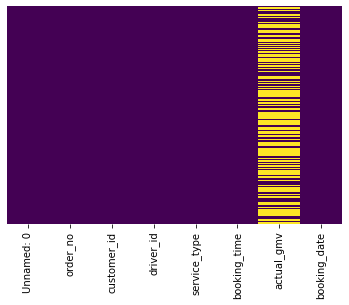

In [16]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap = 'viridis')

In [ ]:
# data['driver_id']=data['driver_id'].apply(impute_driver)

In [17]:
df1=data
# df1["booking_time"] = pd.to_datetime(df1["booking_time"])

In [18]:
#Extracting year, month and day from Booking time column
df1['year'] = pd.DatetimeIndex(df1['booking_time']).year
df1['month'] = pd.DatetimeIndex(df1['booking_time']).month
df1['day'] = pd.DatetimeIndex(df1['booking_time']).day

#### Exporting the cleaned data in csv file

In [19]:
df1.to_csv("Assignment_data_cleaned.csv",index=False)

In [20]:
df1.sample(n = 100000).to_csv("Assignment_data_sample.csv",index=False)

## Exploratory Data Analysis: Looking for additional insights

In [23]:
df1_trial = df1.groupby(['customer_id'])['order_no'].count().reset_index()

In [24]:
df1_trial

,customer_id,order_no
0,0,85
1,2,271941
2,3,3811
3,4,1555
4,5,7473
...,...,...
1948563,704914420,1
1948564,704914428,1
1948565,704914611,1
1948566,704914642,1


#### Calculating actual gmv across all the services

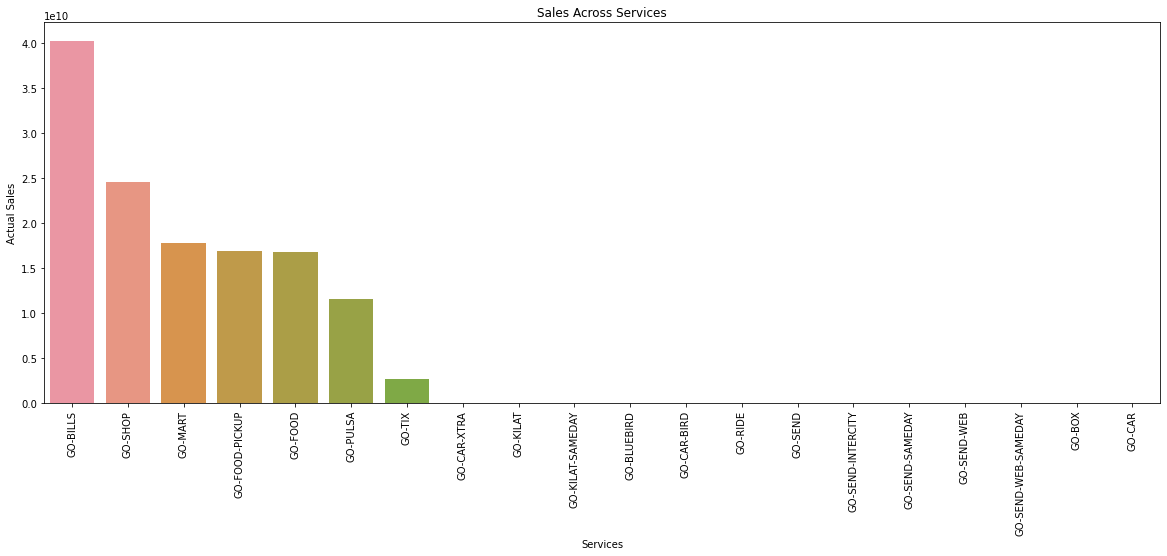

In [26]:
df1_service = df1.groupby(['service_type'])['actual_gmv'].sum().reset_index()
df1_service = df1_service.sort_values('actual_gmv',ascending=False)
# df_tot = df_group.groupby(['VIN'])['Revenue'].sum().reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x="service_type" , y="actual_gmv", data=df1_service)
plt.xticks(rotation=90)
plt.xlabel('Services')
plt.ylabel('Actual Sales')
plt.title('Sales Across Services')
plt.show()

'GO-BILLS' has the highest gmv followed by 'GO-SHOP' and 'GO-MART'
As there are no values present for many of the categories, there is a possibility of others category having higher gmv

#### Orders across Services

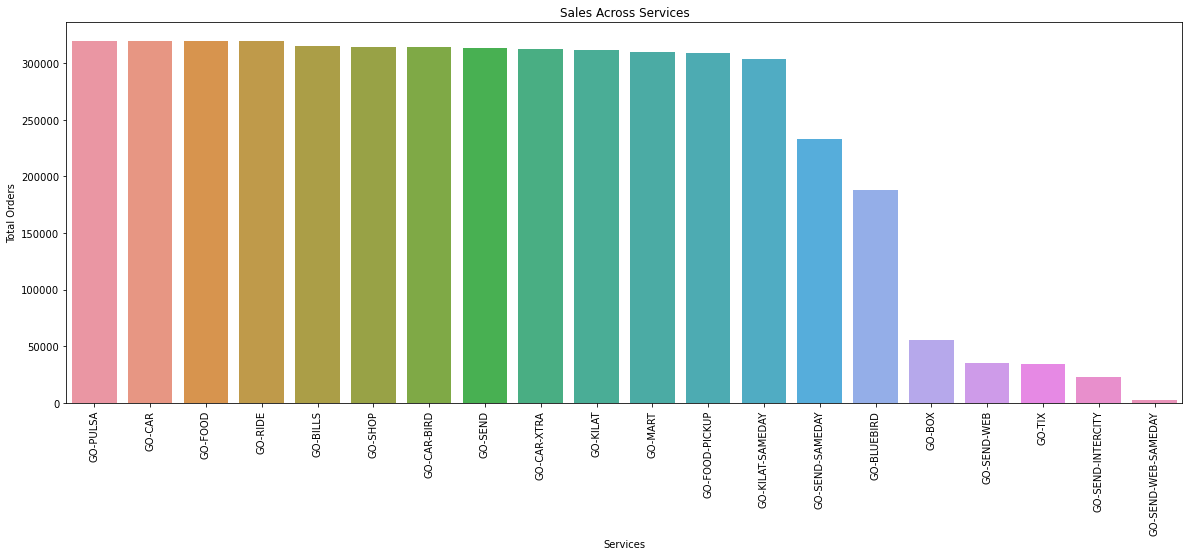

In [35]:
df1_service = df1.groupby(['service_type'])['order_no'].count().reset_index()
df1_service = df1_service.sort_values('order_no',ascending=False)
# df_tot = df_group.groupby(['VIN'])['Revenue'].sum().reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x="service_type" , y="order_no", data=df1_service)
plt.xticks(rotation=90)
plt.xlabel('Services')
plt.ylabel('Total Orders')
plt.title('Sales Across Services')
plt.show()

All of the services has almost equal number of orders, while 'GO-BOX','GO-SEND-WEB','GO-TIX','GO-INTERCITY' and 'GO-SEND-WEB-SAMEDAY' has lower order count

#### GMV and Order across year and month

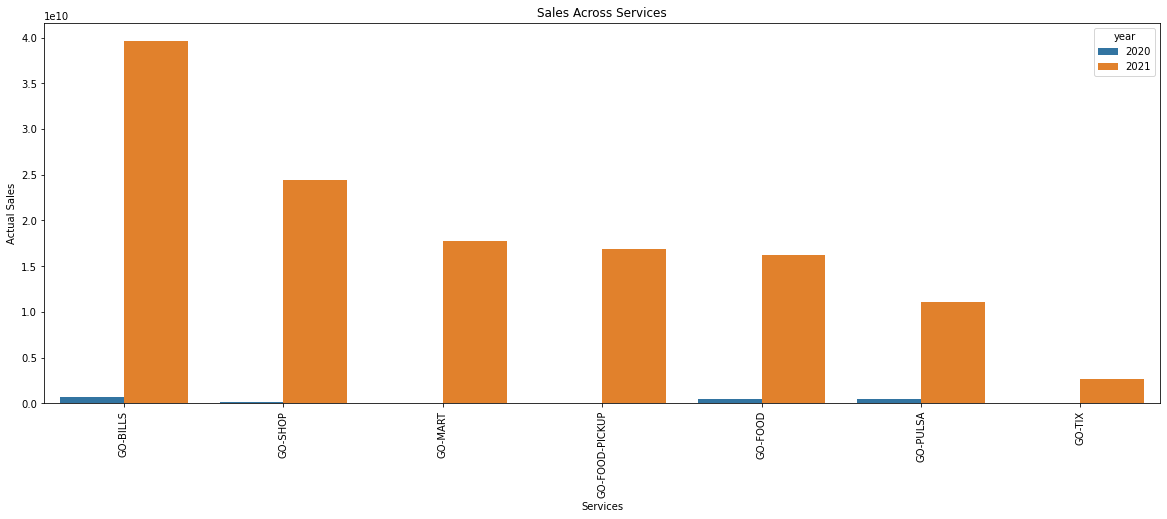

In [31]:
df1_service = df1.groupby(['service_type','year'])['actual_gmv'].sum().reset_index()
df1_service = df1_service[df1_service['actual_gmv'] > 0]
df1_service = df1_service.sort_values('actual_gmv',ascending=False)
# df_tot = df_group.groupby(['VIN'])['Revenue'].sum().reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x="service_type" , y="actual_gmv", hue="year", data=df1_service)
plt.xticks(rotation=90)
plt.xlabel('Services')
plt.ylabel('Actual Sales')
plt.title('Sales Across Services')
plt.show() 

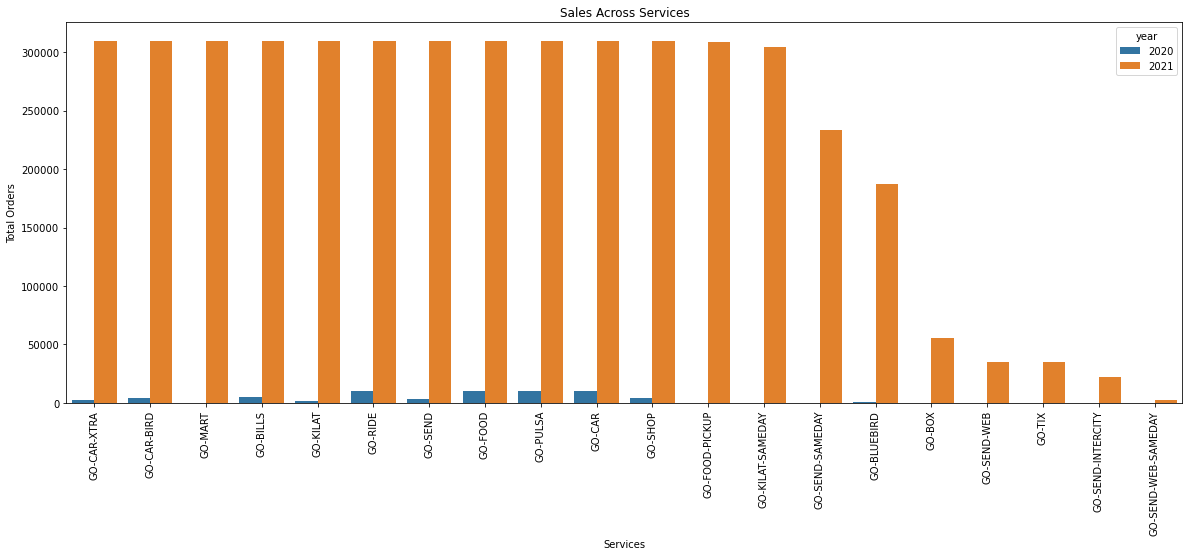

In [36]:
df1_service = df1.groupby(['service_type','year'])['order_no'].count().reset_index()
df1_service = df1_service[df1_service['order_no'] > 0]
df1_service = df1_service.sort_values('order_no',ascending=False)
# df_tot = df_group.groupby(['VIN'])['Revenue'].sum().reset_index()
plt.figure(figsize=(20,7))
sns.barplot(x="service_type" , y="order_no", hue="year", data=df1_service)
plt.xticks(rotation=90)
plt.xlabel('Services')
plt.ylabel('Total Orders')
plt.title('Sales Across Services')
plt.show()

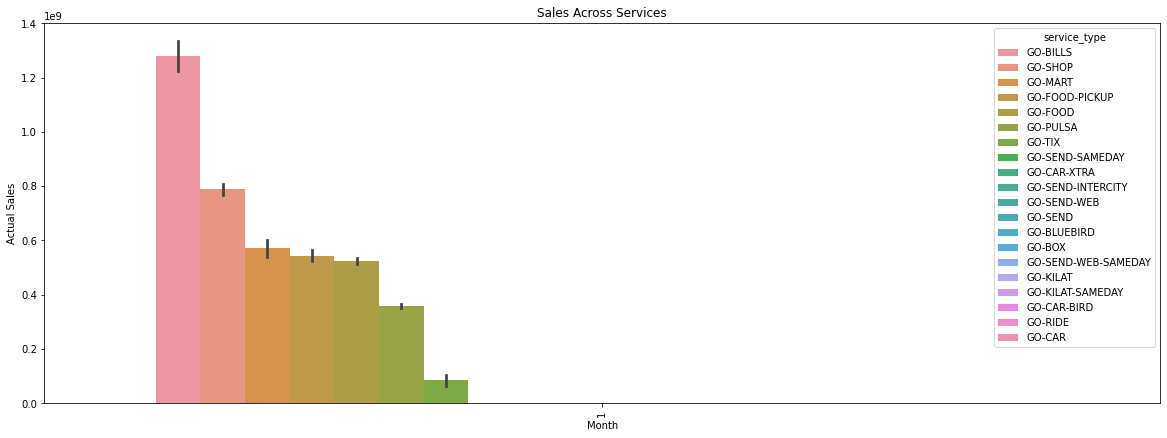

In [32]:
df1_service = df1.groupby(['service_type','year','month','day'])['actual_gmv'].sum().reset_index()
df1_service = df1_service[df1_service['year'] == 2021]
df1_service = df1_service.sort_values('actual_gmv',ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(x="month" , y="actual_gmv", hue="service_type", data=df1_service)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Actual Sales')
plt.title('Sales Across Services')
plt.show()

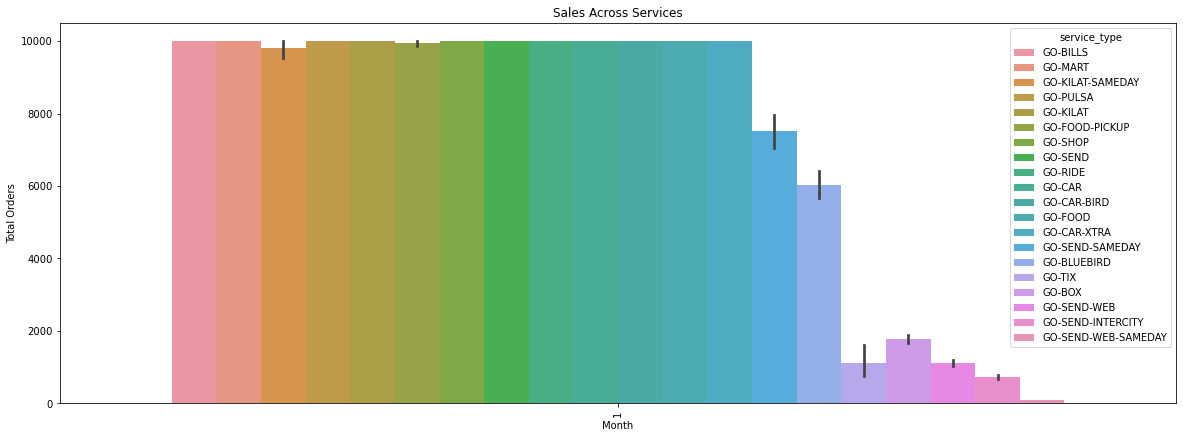

In [37]:
df1_service = df1.groupby(['service_type','year','month','day'])['order_no'].count().reset_index()
df1_service = df1_service[df1_service['year'] == 2021]
df1_service = df1_service.sort_values('order_no',ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(x="month" , y="order_no", hue="service_type", data=df1_service)
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.ylabel('Total Orders')
plt.title('Sales Across Services')
plt.show()

as the data is present for limited time, we can see pattern for only a month

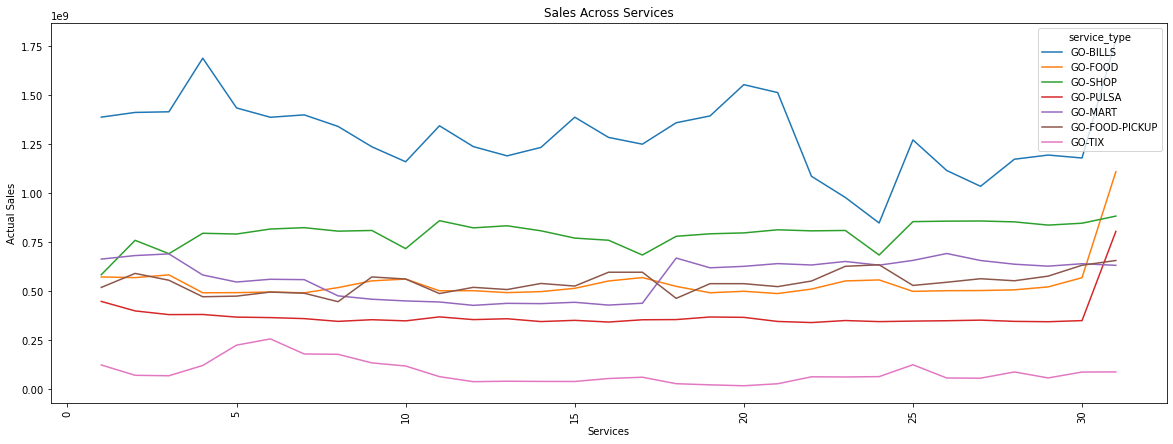

In [30]:
df1_service = df1.groupby(['service_type','day'])['actual_gmv'].sum().reset_index()
df1_service = df1_service[df1_service['actual_gmv'] > 0] 
df1_service = df1_service.sort_values('actual_gmv',ascending=False)
# df_tot = df_group.groupby(['VIN'])['Revenue'].sum().reset_index()
plt.figure(figsize=(20,7))
sns.lineplot(x="day" , y="actual_gmv", hue= "service_type", data=df1_service)
plt.xticks(rotation=90)
plt.xlabel('Services')
plt.ylabel('Actual Sales')
plt.title('Sales Across Services')
plt.show()

'Go-BILLS' is the constant top service followed by 'GO-SHOP'`

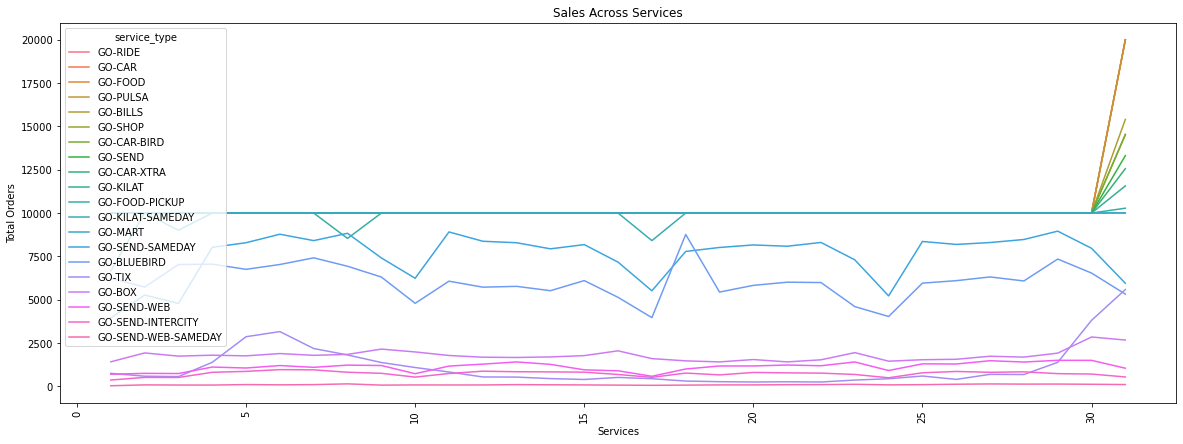

In [38]:
df1_service = df1.groupby(['service_type','day'])['order_no'].count().reset_index()
df1_service = df1_service[df1_service['order_no'] > 0] 
df1_service = df1_service.sort_values('order_no',ascending=False)
# df_tot = df_group.groupby(['VIN'])['Revenue'].sum().reset_index()
plt.figure(figsize=(20,7))
sns.lineplot(x="day" , y="order_no", hue= "service_type", data=df1_service)
plt.xticks(rotation=90)
plt.xlabel('Services')
plt.ylabel('Total Orders')
plt.title('Sales Across Services')
plt.show()

Most of the serivces as equal ~10000 order count across time, while 'SEND-SAME-DAY', 'TIX','INTERCITY' and 'SEND-WEB-SAMEDAY' has lower sales throughout

In [40]:
df2=df1

In [41]:
df2.head(5)

,Unnamed: 0,order_no,customer_id,driver_id,service_type,booking_time,actual_gmv,booking_date,year,month,day
0,0,GK-11-377000658,141,541541952.0,GO-SEND-WEB,2021-01-09 00:04:35.600785+00:00,NaN,2021-01-09,2021,1,9
1,1,GK-11-377000660,141,541860727.0,GO-SEND-WEB,2021-01-09 00:04:36.042753+00:00,NaN,2021-01-09,2021,1,9
2,2,GK-11-377001095,141,700871170.0,GO-SEND-WEB,2021-01-09 00:08:43.994586+00:00,NaN,2021-01-09,2021,1,9
3,3,GK-11-377001557,141,541614894.0,GO-SEND-WEB,2021-01-09 00:12:49.208030+00:00,NaN,2021-01-09,2021,1,9
4,4,GK-11-377002123,141,541213672.0,GO-SEND-WEB,2021-01-09 00:17:34.530810+00:00,NaN,2021-01-09,2021,1,9


### What fraction of the drivers deliveronly food orders on 2021-01-20?

In [42]:
df2_que=df2[df2['booking_date']=='2021-01-20']

In [43]:
total_drivers = df2_que['driver_id'].nunique()
print("there were ",total_drivers,"present on 2021-01-20")

there were  97514 present on 2021-01-20


Counting number of of services provided by each driver

In [44]:
df2_que_group = df2_que.groupby(['driver_id']).count().reset_index()

In [45]:
df2_que_group=df2_que_group[['driver_id','service_type']]

In [46]:
df2_que_group.rename(columns = {'service_type':'no_of_services'}, inplace = True)

In [47]:
df2_que_joined=df2_que.merge(df2_que_group, on='driver_id', how='left')

Filtering data where service type is Food delivery

In [48]:
df2_que_joined=df2_que_joined[df2_que_joined['service_type']=='GO-FOOD']  

Filtering the drivers who provided only food delivery service

In [49]:
df2_que_joined=df2_que_joined[df2_que_joined['no_of_services']==1]  

In [50]:
food_drivers=df2_que_joined['driver_id'].nunique()
print("there were ",food_drivers,"whod delivered food on 2021-010=-20")

there were  6390 whod delivered food on 2021-010=-20


In [51]:
fraction = food_drivers/total_drivers
fraction = round(fraction*100,2)
print(fraction,"% of the drivers deliver only food orders on 2021-01-20")

6.55 % of the drivers deliver only food orders on 2021-01-20


## RFM Analysis

RFM stands for recency, frequency, monetary value. In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

In [53]:
rfm_data = data

Calculating Recency:

Here we are calculating recency for customers who had made a purchase with a company.

In [54]:
df_recency = rfm_data.groupby(by='customer_id', as_index=False)['booking_date'].max()
df_recency['booking_date']= pd.to_datetime(df_recency['booking_date'])
df_recency.columns = ['customer_id', 'booking_date']
recent_date=df_recency['booking_date'].max()
df_recency['Recency'] = df_recency['booking_date'].apply(lambda each:(recent_date-each).days)

Calculating Frequency:

We are here calculating the frequency of frequent transactions of the customer in ordering/buying some product from the company

In [55]:
frequency_df = rfm_data.drop_duplicates().groupby(by=['customer_id'], as_index=False)['booking_date'].count()
frequency_df.columns = ['customer_id', 'Frequency']

Calculating Monetary Value:
    
Here we are calculating the monetary value of customer spend on purchasing products from the company.

In [56]:
monetary_df = rfm_data.groupby(by='customer_id', as_index=False)['actual_gmv'].sum()
monetary_df.columns = ['customer_id', 'Monetary']

Merging all three columns in one dataframe
Here we are merging all the dataframe columns in a single entity using the merge function to display the recency, frequency, monetary value.



In [57]:
rf_df = df_recency.merge(frequency_df, on='customer_id')
rfm_df = rf_df.merge(monetary_df, on='customer_id').drop(columns='booking_date')

Ranking Customer’s based upon their recency, frequency, and monetary score
Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [58]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
# normalizing the rank of the customers
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,customer_id,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,0,0,85,2627579.0,100.0,99.995689,99.995689
1,2,0,271941,0.0,100.0,100.000000,100.000000
2,3,0,3811,0.0,100.0,99.999589,99.999589
3,4,0,1555,0.0,100.0,99.999333,99.999333
4,5,0,7473,0.0,100.0,99.999692,99.999692


Calculating RFM score
RFM score is calculated based upon recency, frequency, monetary value normalize ranks. Based upon this score we divide our customers. Here we rate them on a scale of 5. Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

In [59]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 *rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_Score']]

,customer_id,RFM_Score
0,0,5.00
1,2,5.00
2,3,5.00
3,4,5.00
4,5,5.00
...,...,...
1948563,704914420,2.03
1948564,704914428,2.03
1948565,704914611,2.03
1948566,704914642,2.03


Rating Customer based upon the RFM score

rfm score >4.5 : Top Customer

4.5 > rfm score > 4 : High Value Customer

4>rfm score >3 : Medium value customer

3>rfm score>1.6 : Low-value customer

rfm score<1.6 :Lost Customer

In [60]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >4.5, "Top Customers",(np.where(rfm_df['RFM_Score'] > 4,"High value Customer",(np.where(rfm_df['RFM_Score'] > 3,"Medium Value Customer",np.where(rfm_df['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers'))))))
rfm_df[['customer_id', 'RFM_Score', 'Customer_segment']].head(20)

,customer_id,RFM_Score,Customer_segment
0,0,5.00,Top Customers
1,2,5.00,Top Customers
2,3,5.00,Top Customers
3,4,5.00,Top Customers
4,5,5.00,Top Customers
5,6,5.00,Top Customers
6,8,5.00,Top Customers
7,10,4.19,High value Customer
8,12,5.00,Top Customers
9,14,4.75,Top Customers


### Hypothesis 1

Observation: The %difference between Top Customer and Medium Value Customers is much lower in GMV as compared to total_drivers and total_orders.

Insight: Medium Value Customer is gatting almost same gmv with ~33% less orders and drivers

Recommendation: We should target top customers to roll our promotinal offers to increase revenue generated via gmv

Hypothesis(H0): Focusing more on top customers to roll out marketing and promotional offers with better services will not significantly increase the actual merchandise value for top customers.

### Hypothesis 2

Case2:
    
Observation: The total no of customers with 1 order is 79K followed by 2 orders is 3K while rest are much lower.
    
Insight: The number of one time buyers are dominating the business by high margin.

Recommendation: We should roll out various strategies like loyalty program, personalized feedback and followup, exclusive offers, post purchase engagement, product resommendations, upselling/cross-selling,etc to retain customers for longer time.
    
Hypothesis(H0): The number of one-time buyers does not significantly dominate the business by a high margin.

In [61]:
rfm_df.to_csv("rfm_customer_segmentation.csv")

Visualizing the customer segments
Here we will use a pie plot to display all segments of customers.

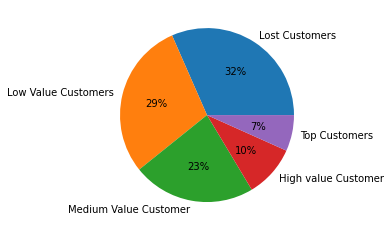

In [62]:
plt.pie(rfm_df.Customer_segment.value_counts(),labels=rfm_df.Customer_segment.value_counts().index,autopct='%.0f%%')
plt.show()